In [1]:
#Importing libraries

import pandas as pd
import numpy as np
import matplotlib as plt

In [2]:
df= pd.read_csv('D:/Trial/Trial Sentinel Nutrient Status/Python/Sentinel2BandBasis.csv')
df.head()


,B1 (Aerosol),B2 (Blue),B3 (Green),B4 (Red),B5 (Red Edge),B6 (Red Edge),B7 (Red Edge),B8 (NIR),B8A (Red Edge),B9 (Water Vapour),B11 (SWIR),B12 (SWIR),N
0,0.030350,0.025063,0.047650,0.026625,0.080050,0.284513,0.362650,0.357825,0.401162,0.394012,0.182212,0.077650,2.67
1,0.029109,0.022891,0.044555,0.023609,0.071645,0.276627,0.362373,0.350491,0.398518,0.390082,0.172882,0.070873,2.47
2,0.029211,0.023456,0.042433,0.023522,0.071389,0.273667,0.361322,0.345133,0.396622,0.388000,0.169178,0.068867,2.38
3,0.028725,0.023062,0.043062,0.024788,0.073137,0.276662,0.366100,0.361425,0.403325,0.393925,0.173462,0.071413,2.42
4,0.027867,0.022400,0.039867,0.022533,0.066400,0.271467,0.360967,0.356267,0.399667,0.391633,0.171367,0.068367,2.40


In [3]:
import seaborn as sns

In [4]:
##masking the upper triangle using np.triu which have 1 value (np.ones_like)
mask = np.triu(np.ones_like(df.corr()))

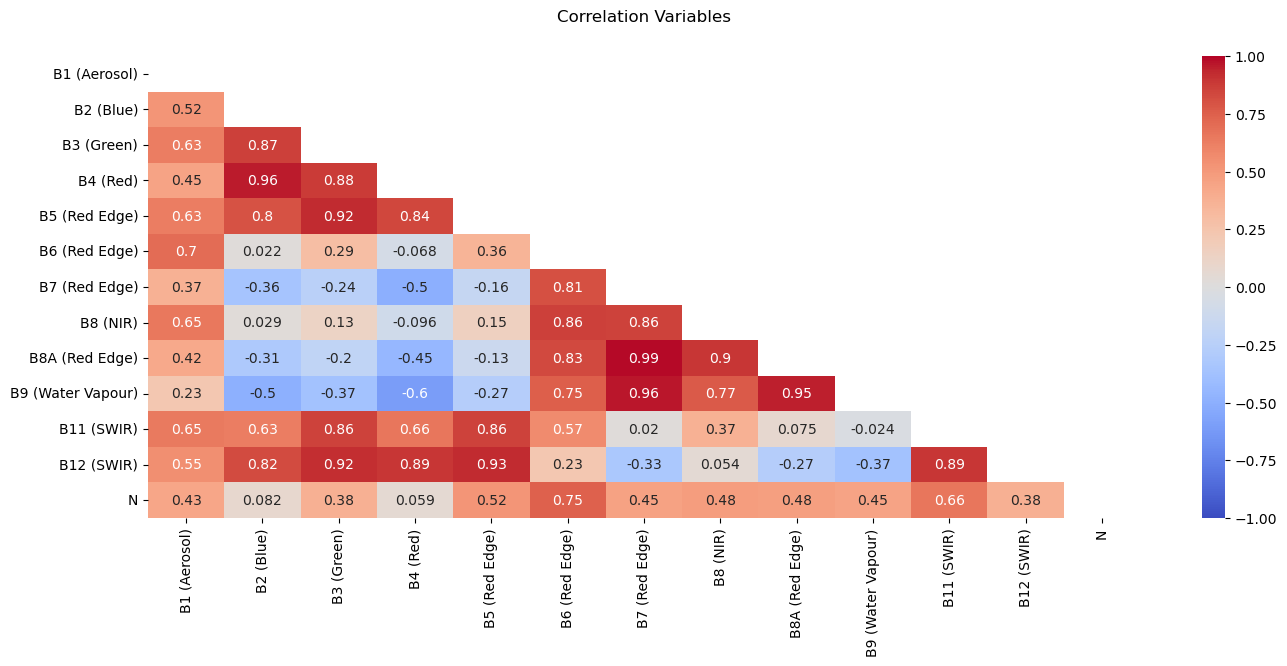

In [6]:
#correlation
plt.pyplot.figure(figsize=(16,6))
heatmap =sns.heatmap(df.corr(), vmin= -1,
           vmax = 1, mask=mask,annot=True, cmap = 'coolwarm')
x= heatmap.set_title('Correlation Variables', fontdict={'fontsize' : 12}, pad=25)

In [8]:
#Save heatmap as png
savefig('heatmapbands.pdf', dpi = 300, format= 'pdf' )

AttributeError: 'Text' object has no attribute 'plt'

In [9]:
#drop no need column for N prediction
nodata = ['B1 (Aerosol)','B2 (Blue)', 'B3 (Green)', 'B4 (Red)', 'B7 (Red Edge)', 'B9 (Water Vapour)', 'B12 (SWIR)', 'P', 'K', 'Ca', 'Mg']

In [10]:
#drop nentioned labels
df_n = df.drop(labels = nodata, axis = 1)

In [11]:
df_n.head()

,B5 (Red Edge),B6 (Red Edge),B8 (NIR),B8A (Red Edge),B11 (SWIR),N
0,0.080050,0.284513,0.357825,0.401162,0.182212,2.67
1,0.071645,0.276627,0.350491,0.398518,0.172882,2.47
2,0.071389,0.273667,0.345133,0.396622,0.169178,2.38
3,0.073137,0.276662,0.361425,0.403325,0.173462,2.42
4,0.066400,0.271467,0.356267,0.399667,0.171367,2.40


In [12]:
#Splitting the dataset
from sklearn.model_selection import train_test_split

# multiple Linear regression based on the 5 bands with highest correlation with N

In [15]:
#multiple Linear regression based on the 5 bands with highest correlation with N
X= df_n[['B5 (Red Edge)', 'B6 (Red Edge)', 'B8 (NIR)', 'B8A (Red Edge)', 'B11 (SWIR)']]
y = df_n['N']

In [18]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0, test_size = 0.4)

In [19]:
#Multiple Linear Regression 
from sklearn.linear_model import LinearRegression

In [20]:
linearmodel = LinearRegression()

In [21]:
linear= linearmodel.fit(X_train, y_train)

In [22]:
print(linear.coef_)
print(linear.intercept_)

[ 95.79180292  31.05089873 -19.70298631  13.83039293 -81.91913326]
2.5883555137505856


In [23]:
n_predict = linear.predict(X_test)

In [24]:
n_predict

array([2.10959517, 2.32028375, 1.84803617, 2.22764829, 2.75080876,
       2.19449976])

In [25]:
#Model Evaluation
from sklearn.metrics import mean_absolute_percentage_error
from sklearn.metrics import r2_score

In [27]:
#converting a table to array 
y_numpy = y_test.to_numpy()

In [28]:
y_numpy

array([2.39, 2.45, 2.4 , 2.35, 2.38, 2.42])

In [29]:
r2_score(n_predict, y_numpy)

-0.3707763413244589

In [31]:
mape = mean_absolute_percentage_error (n_predict, y_numpy)

In [40]:
def accuracy (x) :
      return 1-x

In [33]:
print(accuracy)
print(mape)

0.8700031523398748
0.12999684766012518


In [41]:
accuracy (mape)

0.8700031523398748

# Multiple Regression based on Separability Index

In [45]:
X2 = df[['B7 (Red Edge)', 'B6 (Red Edge)', 'B8 (NIR)', 'B8A (Red Edge)', 'B11 (SWIR)']]
y2= y

In [46]:
X2_train, X2_test, y2_train, y2_test = train_test_split(X2, y2, random_state=0, test_size = 0.4)

In [48]:
linear2 = linearmodel.fit(X2_train, y2_train)

In [49]:
print(linear2.coef_)
print(linear2.intercept_)

[-2.35418884 11.08494772 -6.40094499  6.91853499 11.29417905]
-2.195133632110745


In [50]:
n_predict2 = linear2.predict(X2_test)

In [51]:
n_predict2

array([2.47371441, 2.53147831, 2.38438678, 2.43952552, 2.43341568,
       2.38471063])

In [53]:
r2_score(n_predict2, y2_test)

-0.6574077382037926

In [56]:
def fullaccuracy(t,s) :
    mape2= mean_absolute_percentage_error (t,s)
    acc = 1-mape2
    return acc

In [61]:
fullaccuracy(n_predict2, y2_test)

0.9756628740628281

In [60]:
mean_absolute_percentage_error (n_predict2,y2_test)

0.024337125937171827

In [62]:
y2_test

6     2.39
11    2.45
4     2.40
10    2.35
2     2.38
8     2.42
Name: N, dtype: float64

In [63]:
y_test

6     2.39
11    2.45
4     2.40
10    2.35
2     2.38
8     2.42
Name: N, dtype: float64